In [2]:
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your JSON is in a file named 'graph.json'
data = json.load(open('hackHPI-parser/output.json'))

graph = data['graph']
buildings = data['buildings']
buildings_df = pd.DataFrame(buildings)
areas = data['areas']
areas_df = pd.DataFrame(areas)
roads = data['roads']
roads_df = pd.DataFrame(roads)

In [3]:
buildings_df

,id,center,type,base_area,area
0,0,"{'lat': 52.41230018571429, 'lon': 13.030358557...",residential,127.223454,381.670363
1,1,"{'lat': 52.42469914000001, 'lon': 12.9787669}",residential,127.469723,382.409170
2,2,"{'lat': 52.448118539999996, 'lon': 13.04786952}",residential,81.123817,243.371450
3,3,"{'lat': 52.363898240000005, 'lon': 13.12844516...",residential,71.615889,214.847666
4,4,"{'lat': 52.396796458333334, 'lon': 13.041560825}",high_density_residential,398.258288,1991.291442
...,...,...,...,...,...
34917,34917,"{'lat': 52.46894545555556, 'lon': 13.103657022...",residential,65.767031,197.301093
34918,34918,"{'lat': 52.38359641999999, 'lon': 13.104343499...",residential,34.358176,103.074527
34919,34919,"{'lat': 52.382797849999996, 'lon': 13.08335181...",residential,71.475443,214.426328
34920,34920,"{'lat': 52.39509614, 'lon': 13.10401636}",industrial,177.498881,532.496643


In [4]:
buildings_df['lon'] = buildings_df['center'].apply(lambda x: x['lon'])
buildings_df['lat'] = buildings_df['center'].apply(lambda x: x['lat'])

areas_df['lon'] = areas_df['center'].apply(lambda x: x['lon'])
areas_df['lat'] = areas_df['center'].apply(lambda x: x['lat'])

roads_df['lon'] = roads_df['point'].apply(lambda x: x['lon'])
roads_df['lat'] = roads_df['point'].apply(lambda x: x['lat'])

In [5]:
len(buildings_df), len(areas_df), len(roads_df)

(34922, 2928, 51948)

In [6]:
edges = []
for node in graph:
    for neighbor in node['children']:
        edges.append((node, neighbor))

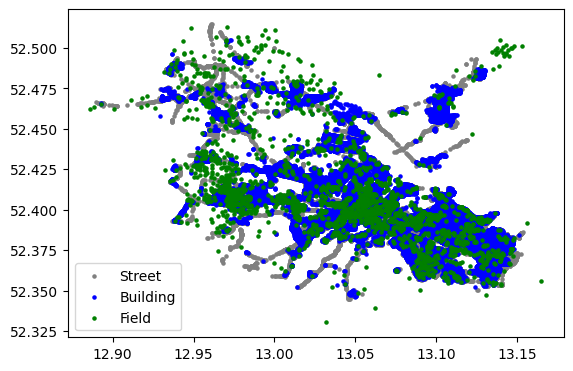

In [7]:
# Convert DataFrame to GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings_df, geometry=gpd.points_from_xy(buildings_df.lon, buildings_df.lat))
areas_gdf = gpd.GeoDataFrame(areas_df, geometry=gpd.points_from_xy(areas_df.lon, areas_df.lat))
roads_gdf = gpd.GeoDataFrame(roads_df, geometry=gpd.points_from_xy(roads_df.lon, roads_df.lat))

# Plot the points
fig, ax = plt.subplots()

# Plot the points on the same axis
roads_gdf.plot(marker='o', color='gray', markersize=5, ax=ax, label='Street')
buildings_gdf.plot(marker='o', color='b', markersize=5, ax=ax, label='Building')
areas_gdf.plot(marker='o', color='g', markersize=5, ax=ax, label='Field')

plt.legend()
plt.show()

In [19]:
clusters = json.load(open('clusters.json'))
clusters_df = pd.DataFrame(clusters)
# add id column
clusters_df['cluster_id'] = clusters_df.index

# Assuming buildings_df has a 'nodeId' column
# Convert the list of nodeIds in each cluster to separate rows
clusters_df = clusters_df.explode('nodes')
clusters_df

,center,nodes,cluster_id
0,"[52.36313381443802, 13.130729044370021]",3,0
0,"[52.36313381443802, 13.130729044370021]",64,0
0,"[52.36313381443802, 13.130729044370021]",98,0
0,"[52.36313381443802, 13.130729044370021]",101,0
0,"[52.36313381443802, 13.130729044370021]",128,0
...,...,...,...
19,"[52.401046233241814, 13.057506034085682]",34870,19
19,"[52.401046233241814, 13.057506034085682]",34871,19
19,"[52.401046233241814, 13.057506034085682]",34872,19
19,"[52.401046233241814, 13.057506034085682]",34893,19


In [20]:
# Merge clusters_df with buildings_df on nodeId
merged_df = pd.merge(clusters_df, buildings_df, left_on='nodes', right_on='id')
merged_df

,center_x,nodes,cluster_id,id,center_y,type,base_area,area,lon,lat
0,"[52.36313381443802, 13.130729044370021]",3,0,3,"{'lat': 52.363898240000005, 'lon': 13.12844516...",residential,71.615889,214.847666,13.128445,52.363898
1,"[52.36313381443802, 13.130729044370021]",64,0,64,"{'lat': 52.355998650000004, 'lon': 13.13533231...",residential,31.679830,95.039490,13.135332,52.355999
2,"[52.36313381443802, 13.130729044370021]",98,0,98,"{'lat': 52.35904694, 'lon': 13.13017146}",residential,99.548298,298.644893,13.130171,52.359047
3,"[52.36313381443802, 13.130729044370021]",101,0,101,"{'lat': 52.3663942, 'lon': 13.12816728}",residential,497.076492,1491.229475,13.128167,52.366394
4,"[52.36313381443802, 13.130729044370021]",128,0,128,"{'lat': 52.35837014, 'lon': 13.131854780000001}",residential,148.296370,444.889111,13.131855,52.358370
...,...,...,...,...,...,...,...,...,...,...
34917,"[52.401046233241814, 13.057506034085682]",34870,19,34870,"{'lat': 52.40083443333333, 'lon': 13.051592183...",high_density_residential,128.724265,386.172794,13.051592,52.400834
34918,"[52.401046233241814, 13.057506034085682]",34871,19,34871,"{'lat': 52.39895541666667, 'lon': 13.067721483...",high_density_residential,155.006567,620.026269,13.067721,52.398955
34919,"[52.401046233241814, 13.057506034085682]",34872,19,34872,"{'lat': 52.40707791111111, 'lon': 13.060796866...",high_density_residential,312.833178,938.499535,13.060797,52.407078
34920,"[52.401046233241814, 13.057506034085682]",34893,19,34893,"{'lat': 52.39252667142857, 'lon': 13.052198214...",residential,572.922679,1718.768037,13.052198,52.392527


In [24]:


import matplotlib.colors as mcolors

# Convert merged DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df.lat, merged_df.lon))

# Create a new figure and axis
fig, ax = plt.subplots()

# Get a list of unique colors
colors = list(mcolors.CSS4_COLORS.keys())

# Plot each cluster with a different color
for i, cluster in enumerate(gdf['cluster_id'].unique()):
    gdf[gdf['cluster_id'] == cluster].plot(marker='o', color=colors[i % len(colors)], markersize=5, ax=ax, label=f'Cluster {cluster}')

#plt.legend()
plt.show()